In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/III SEM INTERNSHIP/kidney.csv")

We use the following representation to collect the dataset
age - age
bp - blood pressure
sg - specific gravity
al - albumin
su - sugar
rbc - red blood cells
pc - pus cell
pcc - pus cell clumps
ba - bacteria
bgr - blood glucose random
bu - blood urea
sc - serum creatinine
sod - sodium
pot - potassium
hemo - hemoglobin
pcv - packed cell volume
wc - white blood cell count
rc - red blood cell count
htn - hypertension
dm - diabetes mellitus
cad - coronary artery disease
appet - appetite
pe - pedal edema
ane - anemia
class - class


Attribute Information:

We use 24 + class = 25 ( 11 numeric ,14 nominal)
1.Age(numerical)
age in years
2.Blood Pressure(numerical)
bp in mm/Hg
3.Specific Gravity(nominal)
sg - (1.005,1.010,1.015,1.020,1.025)
4.Albumin(nominal)
al - (0,1,2,3,4,5)
5.Sugar(nominal)
su - (0,1,2,3,4,5)
6.Red Blood Cells(nominal)
rbc - (normal,abnormal)
7.Pus Cell (nominal)
pc - (normal,abnormal)
8.Pus Cell clumps(nominal)
pcc - (present,notpresent)
9.Bacteria(nominal)
ba - (present,notpresent)
10.Blood Glucose Random(numerical)
bgr in mgs/dl
11.Blood Urea(numerical)
bu in mgs/dl
12.Serum Creatinine(numerical)
sc in mgs/dl
13.Sodium(numerical)
sod in mEq/L
14.Potassium(numerical)
pot in mEq/L
15.Hemoglobin(numerical)
hemo in gms
16.Packed Cell Volume(numerical)
17.White Blood Cell Count(numerical)
wc in cells/cumm
18.Red Blood Cell Count(numerical)
rc in millions/cmm
19.Hypertension(nominal)
htn - (yes,no)
20.Diabetes Mellitus(nominal)
dm - (yes,no)
21.Coronary Artery Disease(nominal)
cad - (yes,no)
22.Appetite(nominal)
appet - (good,poor)
23.Pedal Edema(nominal)
pe - (yes,no)
24.Anemia(nominal)
ane - (yes,no)
25.Class (nominal)
class - (ckd,notckd)

In [ ]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [ ]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [ ]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
df.count()

id                400
age               391
bp                388
sg                353
al                354
su                351
rbc               248
pc                335
pcc               396
ba                396
bgr               356
bu                381
sc                383
sod               313
pot               312
hemo              348
pcv               330
wc                295
rc                270
htn               398
dm                398
cad               398
appet             399
pe                399
ane               399
classification    400
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [ ]:
df.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
df['classification']=[1 if i.strip()=="ckd" else 0 for i in df["classification"]]
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,1
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,1
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,1
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,1


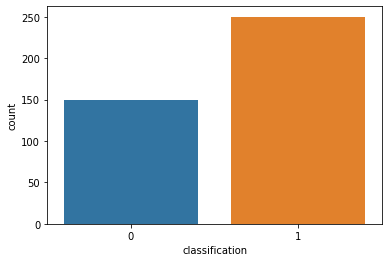

In [ ]:
sns.countplot(x=df['classification'])
plt.show()

ckd present then 1
not ckd present then 0

<AxesSubplot:xlabel='age'>

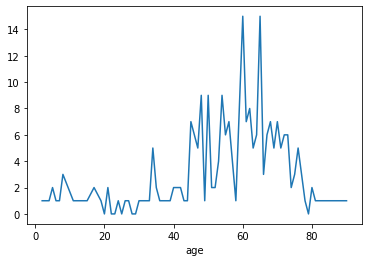

In [ ]:
df.groupby('age').classification.sum().plot(kind='line')


<AxesSubplot:xlabel='sg'>

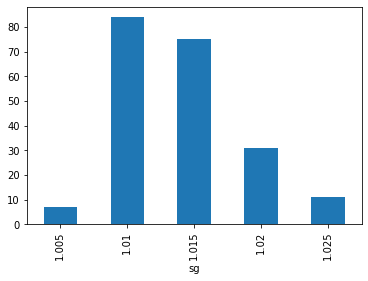

In [ ]:
df.groupby('sg').classification.sum().plot(kind='bar')

<AxesSubplot:xlabel='bp'>

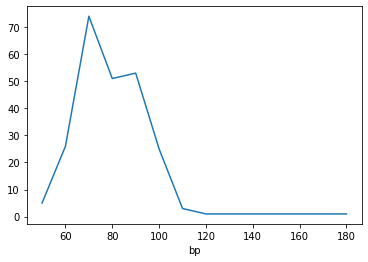

In [ ]:
df.groupby('bp').classification.sum().plot(kind='line')

In [ ]:
df["rbc"]=[0 if k=='normal' else 1 for k in df["rbc"]]
df["rbc"].fillna(value=0)
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,1,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,1
1,1,7.0,50.0,1.020,4.0,0.0,1,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,1
2,2,62.0,80.0,1.010,2.0,3.0,0,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,1
3,3,48.0,70.0,1.005,4.0,0.0,0,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
4,4,51.0,80.0,1.010,2.0,0.0,0,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,1


In [ ]:
df['pc']=[0 if k=='normal' else 1 for k in df["pc"]]
df["pc"].fillna(value=0)
df['pc']=df['pc'].astype('int32')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,1,0,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,1
1,1,7.0,50.0,1.020,4.0,0.0,1,0,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,1
2,2,62.0,80.0,1.010,2.0,3.0,0,0,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,1
3,3,48.0,70.0,1.005,4.0,0.0,0,1,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
4,4,51.0,80.0,1.010,2.0,0.0,0,0,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,1


<AxesSubplot:ylabel='pc'>

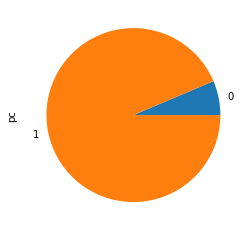

In [ ]:
df.groupby('classification').pc.sum().plot(kind='pie')

In [ ]:
df.groupby('classification').mean()

,id,age,bp,sg,al,su,rbc,pc,bgr,bu,sc,sod,pot,hemo
classification,,,,,,,,,,,,,,
0,324.5,46.516779,71.351351,1.022414,0.000000,0.00000,0.06,0.060,107.722222,32.798611,0.868966,141.731034,4.337931,15.188194
1,124.5,54.541322,79.625000,1.013918,1.722488,0.76699,0.76,0.528,175.419811,72.389030,4.414916,133.901786,4.878443,10.647549


In [ ]:
df['rbc']=df['rbc'].astype('int32')

<AxesSubplot:xlabel='pcc'>

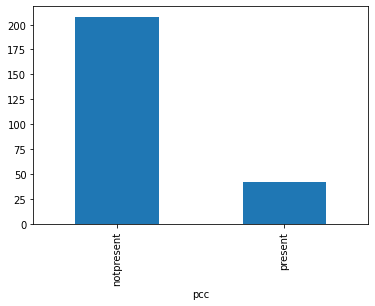

In [ ]:
df.groupby('pcc').classification.sum().plot(kind='bar')

<AxesSubplot:xlabel='ba'>

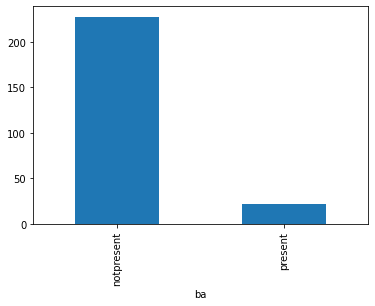

In [ ]:
df.groupby('ba').classification.sum().plot(kind='bar')

<AxesSubplot:xlabel='cad'>

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


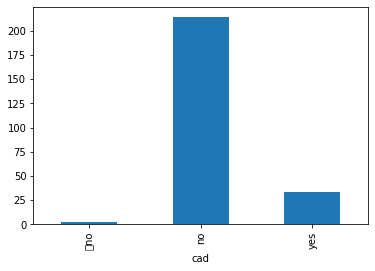

In [ ]:
df.groupby('cad',dropna=True).classification.sum().plot(kind='bar')

<AxesSubplot:xlabel='ane'>

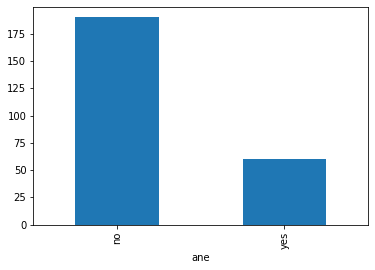

In [ ]:
df.groupby('ane').classification.sum().plot(kind='bar')

<AxesSubplot:xlabel='htn'>

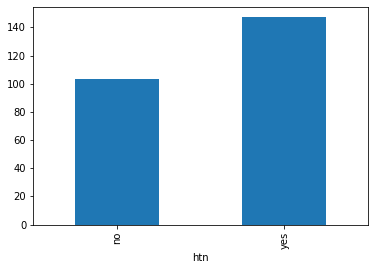

In [ ]:
df.groupby('htn').classification.sum().plot(kind='bar')

1-> normal rbc

0->  abnormal rbc

<AxesSubplot:ylabel='rbc'>

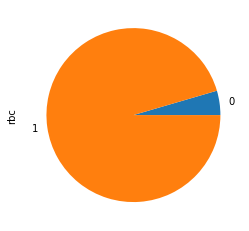

In [ ]:
df.groupby('classification').rbc.sum().plot(kind='pie')

<AxesSubplot:xlabel='al'>

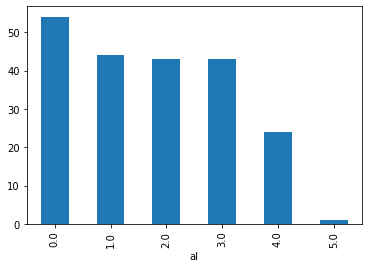

In [ ]:
df.groupby('al').classification.sum().plot(kind='bar')

In [ ]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                 int32
pc                  int32
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification      int64
dtype: object

In [ ]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['pc']= label_encoder.fit_transform(df['pc'])
df['pc'].unique()
df['pcc']= label_encoder.fit_transform(df['pcc'])
df['pcc'].unique()
df['rbc']= label_encoder.fit_transform(df['rbc'])
df['rbc'].unique()
df['ba']= label_encoder.fit_transform(df['ba'])
df['ba'].unique()
df['pcv']= label_encoder.fit_transform(df['pcv'])
df['pcv'].unique()
df['wc']= label_encoder.fit_transform(df['wc'])
df['wc'].unique()
df['rc']= label_encoder.fit_transform(df['rc'])
df['rc'].unique()
df['htn']= label_encoder.fit_transform(df['htn'])
df['htn'].unique()
df['dm']= label_encoder.fit_transform(df['dm'])
df['dm'].unique()
df['cad']= label_encoder.fit_transform(df['cad'])
df['cad'].unique()
df['appet']= label_encoder.fit_transform(df['appet'])
df['appet'].unique()
df['pe']= label_encoder.fit_transform(df['pe'])
df['pe'].unique()
df['ane']= label_encoder.fit_transform(df['ane'])
df['ane'].unique()
df['age']= label_encoder.fit_transform(df['age'])
df['age'].unique()
df['bp']= label_encoder.fit_transform(df['bp'])
df['bp'].unique()
df['sg']= label_encoder.fit_transform(df['sg'])
df['sg'].unique()
df['al']= label_encoder.fit_transform(df['al'])
df['al'].unique()
df['sc']= label_encoder.fit_transform(df['sc'])
df['sc'].unique()
df['su']= label_encoder.fit_transform(df['su'])
df['su'].unique()
df['sod']= label_encoder.fit_transform(df['sod'])
df['sod'].unique()
df['pot']= label_encoder.fit_transform(df['pot'])
df['pot'].unique()
df['hemo']= label_encoder.fit_transform(df['hemo'])
df['hemo'].unique()
df['classification']= label_encoder.fit_transform(df['classification'])
df['classification'].unique()
df['bgr']= label_encoder.fit_transform(df['bgr'])
df['bgr'].unique()
df['bu']= label_encoder.fit_transform(df['bu'])
df['bu'].unique()

array([ 23,   5,  40,  43,  13,  12,  41,  18,  46,  79,  42,  55,  65,
        69,  98,  32,  66,  14,  93, 104,  99, 118,  36,  58,  31,  15,
        96,  20,  26,  95,  16,  49,  77,  53,  62,   7, 107,  60,  68,
        11,   4,  19,  82,  50,  25, 100,  90,  74, 117,   2,  80,  56,
         6,  70,  22,   3,  89,  34,  64,  75, 105,  24,  33,  39,  63,
        38,  78,   9, 110,  67,  84,  37,  54,  21,  27,   8, 111,  17,
        85, 102,  35, 108, 103,  52,  91, 101, 116,  10, 113,  86,  59,
        29,  30,  28,  81,   0,  92,  45,  87,  88,  51,  83, 112,  76,
        97,  72,  57,  94,  47,  44,  73, 106,  71, 114,  48,  61, 109,
       115,   1])

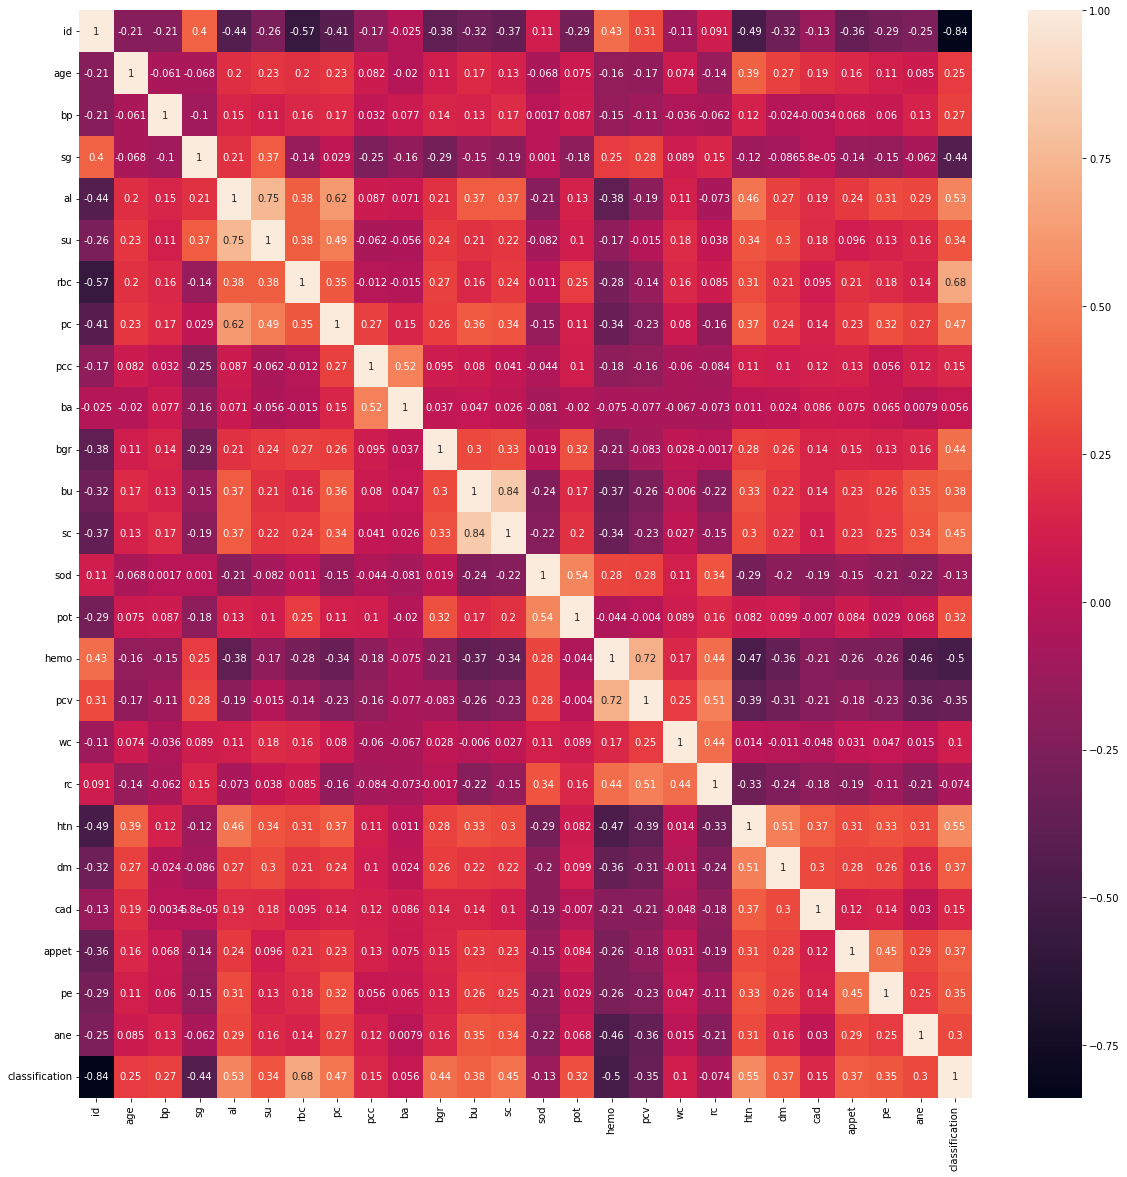

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.select_dtypes(['float64','int64','int32']).corr(),annot=True)
plt.show()

In [ ]:
df=df.drop(axis=1,columns=['id'])

In [ ]:
the=0.3
corrMatrix=df.corr()
filt=np.abs(corrMatrix["classification"])>the
corrf=corrMatrix.columns[filt].tolist()


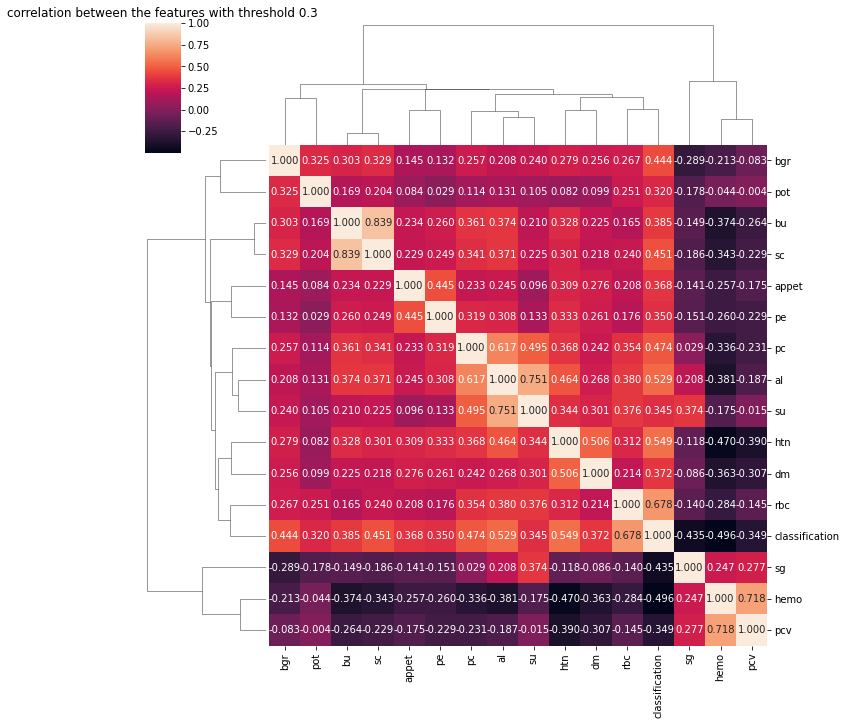

<Figure size 1440x1440 with 0 Axes>

In [ ]:
sns.clustermap(df[corrf].corr(),annot=True,fmt=".3f")
plt.title("correlation between the features with threshold 0.3")
plt.figure(figsize=(20,20))
plt.show()

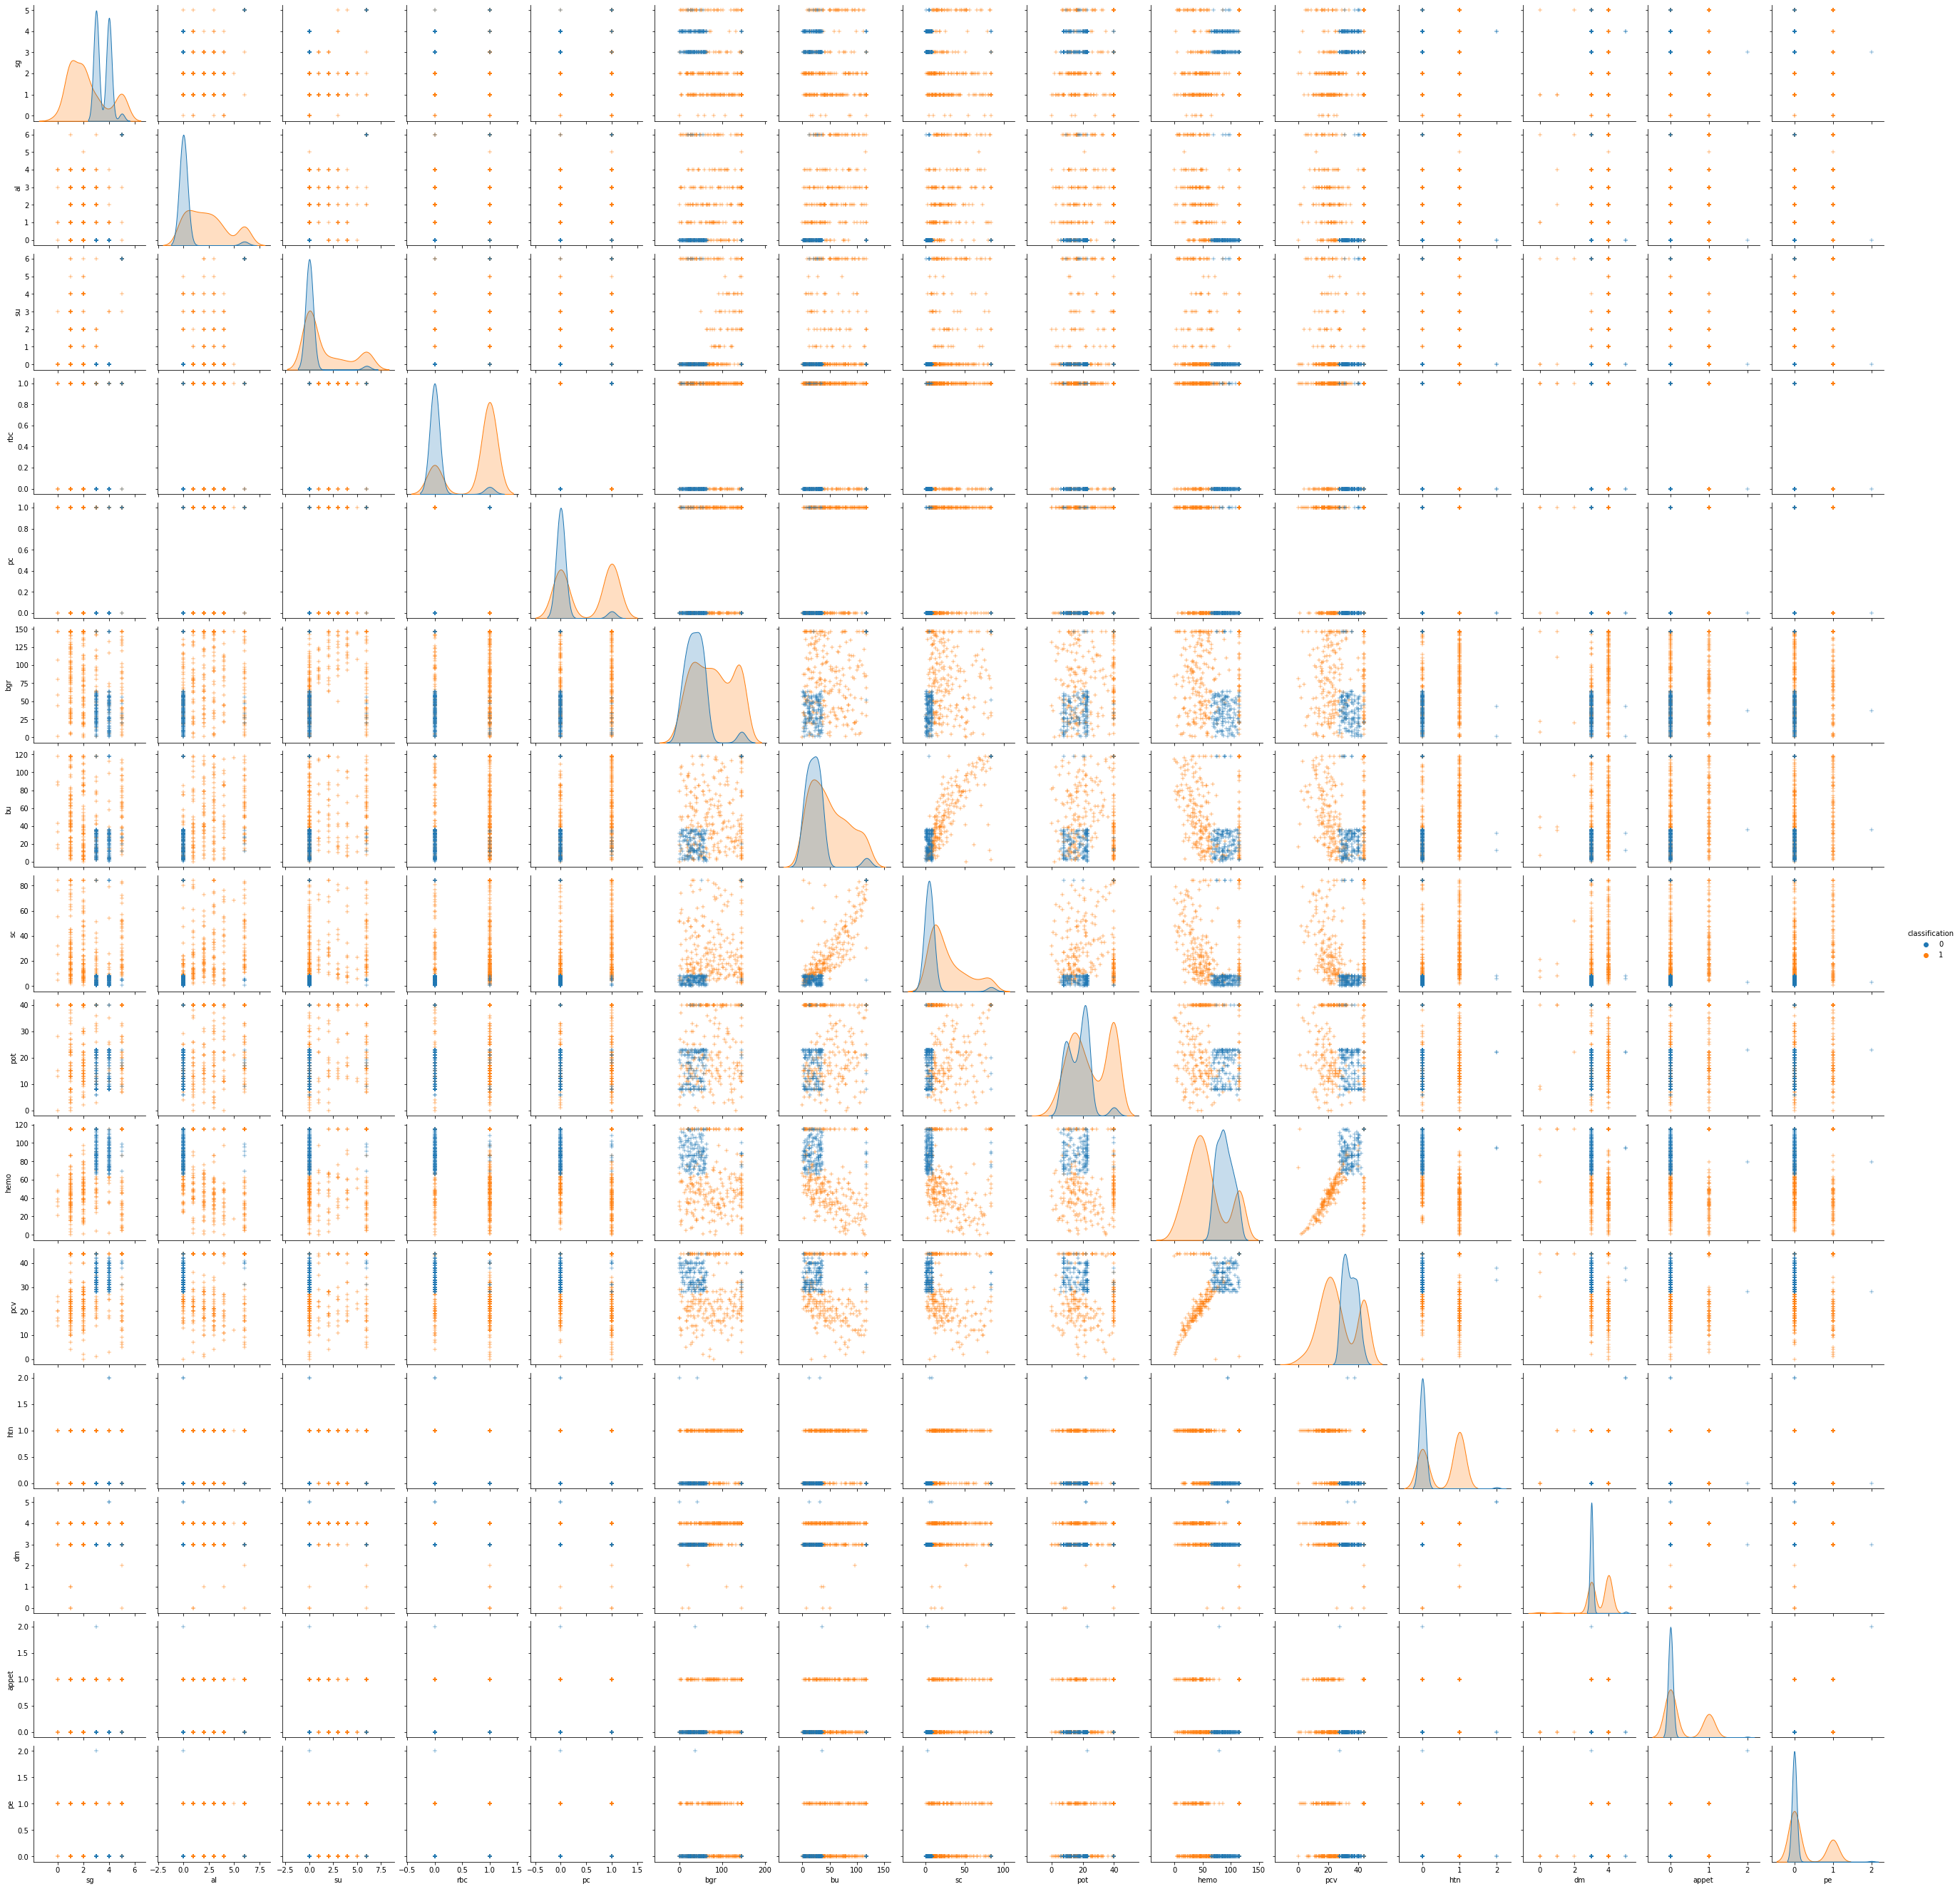

In [ ]:
sns.pairplot(df[corrf],diag_kind="kde",markers="+",hue="classification")
plt.show()

In [ ]:
df=df[corrf]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.decomposition import PCA
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
df.dtypes

sg                int64
al                int64
su                int64
rbc               int64
pc                int64
bgr               int64
bu                int64
sc                int64
pot               int64
hemo              int64
pcv               int64
htn               int64
dm                int64
appet             int64
pe                int64
classification    int64
dtype: object

In [ ]:
# outlier detection
y=df['classification']
x=df.drop(["classification"],axis=1)
clf=LocalOutlierFactor(n_neighbors=20)
clf.fit_predict(x)
xscore=clf.negative_outlier_factor_


In [ ]:
outlierscore=pd.DataFrame()
outlierscore["score"]=xscore
outlierscore

,score
0,-1.148450
1,-1.006211
2,-1.008927
3,-1.130023
4,-1.171784
...,...
395,-1.060895
396,-1.026594
397,-0.971387
398,-0.991298


In [ ]:
threshold=-2.0
filt=outlierscore["score"]< threshold
outlierindex=outlierscore[filt].index.tolist()

In [ ]:
radius=(xscore.max()-xscore)/(xscore.max()-xscore.min())
outlierscore["radius"]=radius

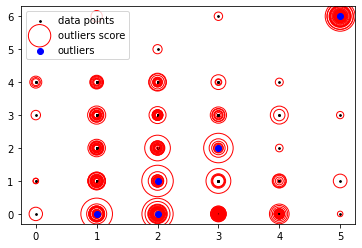

In [ ]:
plt.scatter(x.iloc[:,0],x.iloc[:,1],color='k',s=3,label="data points")
plt.scatter(x.iloc[:,0],x.iloc[:,1],s=1000*radius,edgecolors='r',facecolors="none",label="outliers score")
plt.scatter(x.iloc[outlierindex,0],x.iloc[outlierindex,1],color='b',label='outliers')
plt.legend()
plt.show()

In [ ]:
x=x.drop(outlierindex)
y=y.drop(outlierindex).values

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.fit_transform(xtest)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=200)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=200)

In [ ]:
ypred=knn.predict(xtest)

In [ ]:
cm=confusion_matrix(ytest,ypred)
acc=accuracy_score(ytest,ypred)
print(acc)

0.6582278481012658


In [ ]:

from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.9747899159663865


roc_auc_score for DecisionTree:  0.9737891737891738


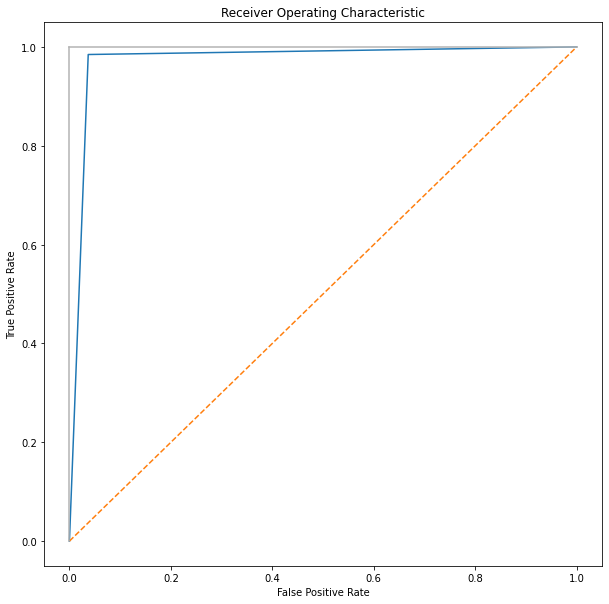

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred)
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_pred))
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()